
# **Predictive Analysis: Optimizing Pressure Control through Machine Learning**

By    : Muhammad Fatih Idlan (faiti.alfaqar@gmail.com)



# Project Domain
This project was done to fulfil the *Machine Learning Terapan* 1st assignment submission on Dicoding. The domain used in this project is manufacturing control process, especially pressure control.

# Background
Pressure control is a fundamental aspect of many industrial processes, particularly in chemical engineering, where maintaining optimal pressure levels can significantly enhance efficiency, safety, and product quality. However, real-time fluctuations due to varying input conditions, system disturbances, and equipment aging pose challenges to traditional control methods. Traditional pressure control methods rely on Proportional-Integral-Derivative (PID) controllers, which require manual tuning and often struggle with dynamic system behaviors or process disturbances. Moreover, increasing feedback noise making PID performs poorly comparing to neural network model [[ 1 ]](https://www.semanticscholar.org/paper/A-comparison-between-a-traditional-PID-controller-a-Conradt/efb1c57c0dbc3b88cd35085f677869104fce5474). The existence of feedback noise is inevitably present in real world setting. Thus making machine learning based model is more flexible in real-time fluctuations.

# Business Understanding
## Problem Statement
Starting with explanation from the background above, core problems that this project aims to solve are:

*   What are the variables that hugely affect target i.e. source pressure for developing predictive models that dynamically adjust it?
*   How are the variables those hugely affect the source pressure is related?
*   How the performance of each model to predict the source pressure that has been build?

## Objectives
According to problem statement above, this project has several objectives too, that are:

*   Knowing the most influencial variables toward source pressure in the system
*   Learn the relation between influencial variables to source pressure
*   Determining high performance models

## Solution
To achive the objectives, we need to perform several things such as:

*   Implementing correlation heatmap for each variables to identify influencial variables
*   Using Linear Regression, K-Nearest Neighbour, and Dense Neural Network to selecting high performance corresponding to evaluation metrics (MSE)

# Import Package dan Libraries

In [38]:
import kagglehub
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Data Loading

In [39]:
path = kagglehub.dataset_download("guanlintao/smart-pressure-control-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/guanlintao/smart-pressure-control-prediction/versions/1


In [40]:
train_path = f'{path}/train.csv'
test_path = f'{path}/test.csv'

In [41]:
# Merge the train and test set from kaggle

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
merge = pd.concat([train, test])
merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4320 entries, 0 to 863
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEGC1PV    4320 non-null   float64
 1   DEGC2PV    4320 non-null   float64
 2   DEGC3PV    4320 non-null   float64
 3   DEGC4PV    4320 non-null   float64
 4   DEGC5PV    4320 non-null   float64
 5   DEGC6PV    4320 non-null   float64
 6   DEGC1SV    4320 non-null   float64
 7   DEGC2SV    4320 non-null   int64  
 8   DEGC3SV    4320 non-null   int64  
 9   DEGC4SV    4320 non-null   int64  
 10  DEGC5SV    4320 non-null   int64  
 11  DEGC6SV    4320 non-null   int64  
 12  NM3/H.1PV  4320 non-null   int64  
 13  NM3/H.2PV  4320 non-null   int64  
 14  NM3/H.3PV  4320 non-null   int64  
 15  NM3/H.4PV  4320 non-null   int64  
 16  NM3/H.5PV  4320 non-null   int64  
 17  NM3/H.6PV  4320 non-null   int64  
 18  NM3/H.1SV  4320 non-null   int64  
 19  NM3/H.2SV  4320 non-null   int64  
 20  NM3/H.3SV  432

## Data Cleaning

*   Checking empty data
*   Checking duplicated data



In [42]:
print(merge.isna().sum())

DEGC1PV      0
DEGC2PV      0
DEGC3PV      0
DEGC4PV      0
DEGC5PV      0
DEGC6PV      0
DEGC1SV      0
DEGC2SV      0
DEGC3SV      0
DEGC4SV      0
DEGC5SV      0
DEGC6SV      0
NM3/H.1PV    0
NM3/H.2PV    0
NM3/H.3PV    0
NM3/H.4PV    0
NM3/H.5PV    0
NM3/H.6PV    0
NM3/H.1SV    0
NM3/H.2SV    0
NM3/H.3SV    0
NM3/H.4SV    0
NM3/H.5SV    0
NM3/H.6SV    0
TEMP         0
FC1          0
FC2          0
FC3          0
FC4          0
FC5          0
FC6          0
mmH2O        0
dtype: int64


In [43]:
print(f'Duplicated data: {merge.duplicated().sum()}')

Duplicated data: 480


In [44]:
# Remove duplicated data

merge_1 = merge.drop_duplicates()
print(f'Duplicated data: {merge_1.duplicated().sum()}')

Duplicated data: 0


In [45]:
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3840 entries, 0 to 863
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEGC1PV    3840 non-null   float64
 1   DEGC2PV    3840 non-null   float64
 2   DEGC3PV    3840 non-null   float64
 3   DEGC4PV    3840 non-null   float64
 4   DEGC5PV    3840 non-null   float64
 5   DEGC6PV    3840 non-null   float64
 6   DEGC1SV    3840 non-null   float64
 7   DEGC2SV    3840 non-null   int64  
 8   DEGC3SV    3840 non-null   int64  
 9   DEGC4SV    3840 non-null   int64  
 10  DEGC5SV    3840 non-null   int64  
 11  DEGC6SV    3840 non-null   int64  
 12  NM3/H.1PV  3840 non-null   int64  
 13  NM3/H.2PV  3840 non-null   int64  
 14  NM3/H.3PV  3840 non-null   int64  
 15  NM3/H.4PV  3840 non-null   int64  
 16  NM3/H.5PV  3840 non-null   int64  
 17  NM3/H.6PV  3840 non-null   int64  
 18  NM3/H.1SV  3840 non-null   int64  
 19  NM3/H.2SV  3840 non-null   int64  
 20  NM3/H.3SV  384

In [46]:
merge_1.head()

,DEGC1PV,DEGC2PV,DEGC3PV,DEGC4PV,DEGC5PV,DEGC6PV,DEGC1SV,DEGC2SV,DEGC3SV,DEGC4SV,...,NM3/H.5SV,NM3/H.6SV,TEMP,FC1,FC2,FC3,FC4,FC5,FC6,mmH2O
0,1022.0,1053.6,1240.2,1217.0,1165.3,1185.6,1005.0,1070,1220,1200,...,1370,6548,541.2,17.1,14.5,18.0,34.5,4.3,53.6,501
1,1019.2,1009.0,1215.5,1190.7,1133.6,1156.2,1005.0,1070,1210,1200,...,2299,6548,505.2,13.7,15.8,20.3,35.2,13.2,48.2,618
2,725.9,710.3,802.1,796.5,853.8,775.3,1050.2,1070,1200,1180,...,1900,3778,419.1,10.0,9.3,9.8,15.0,8.2,30.4,500
3,980.1,1032.2,1215.5,1189.0,1136.4,1161.0,1005.0,1070,1220,1210,...,2164,6465,529.1,15.7,14.9,18.0,36.4,12.7,49.0,605
4,1042.2,1023.1,1237.0,1183.7,1153.2,1103.4,1005.0,1070,1210,1200,...,988,4624,549.8,8.8,7.0,15.0,20.0,3.0,40.4,501


# Data Understanding

The dataset that used in this project is Smart Pressure Control Prediction, which can be accessed through kaggle [[ 2 ]](https://www.kaggle.com/datasets/guanlintao/smart-pressure-control-prediction). This dataset consist of 2 csv files, train and test, which in total has 4320 rows with 32 column. The explanation for each column can be seen below:

*   DEGC1PV = Equipment temperature in zone 1
*   DEGC2PV = Equipment temperature in zone 2
*   DEGC3PV = Equipment temperature in zone 3
*   DEGC4PV = Equipment temperature in zone 4
*   DEGC5PV = Equipment temperature in zone 5
*   DEGC6PV = Equipment temperature in zone 6
*   DEGC1SV = Desired equipment temperature in zone 1
*   DEGC2SV = Desired equipment temperature in zone 2
*   DEGC3SV = Desired equipment temperature in zone 3
*   DEGC4SV = Desired equipment temperature in zone 4
*   DEGC5SV = Desired equipment temperature in zone 5
*   DEGC6SV = Desired equipment temperature in zone 6
*   NM3/H.1PV = Air flowrate in zone 1
*   NM3/H.2PV = Air flowrate in zone 2
*   NM3/H.3PV = Air flowrate in zone 3
*   NM3/H.4PV = Air flowrate in zone 4
*   NM3/H.5PV = Air flowrate in zone 5
*   NM3/H.6PV = Air flowrate in zone 6
*   NM3/H.1SV = Desired air flowrate in zone 1
*   NM3/H.2SV = Desired air flowrate in zone 2
*   NM3/H.3SV = Desired air flowrate in zone 3
*   NM3/H.4SV = Desired air flowrate in zone 4
*   NM3/H.5SV = Desired air flowrate in zone 5
*   NM3/H.6SV = Desired air flowrate in zone 6
*   TEMP = Air temperature
*   FC1 = Control valve opening degree in zone 1
*   FC2 = Control valve opening degree in zone 2
*   FC3 = Control valve opening degree in zone 3
*   FC4 = Control valve opening degree in zone 4
*   FC5 = Control valve opening degree in zone 5
*   FC6 = Control valve opening degree in zone 6
*   mmH2O = Source input pressure

# Exploratory Data Analysis (EDA)

## Statistical Properties

In [73]:
merge_1.describe()

,DEGC1PV,DEGC2PV,DEGC3PV,DEGC4PV,DEGC5PV,DEGC6PV,DEGC1SV,DEGC2SV,DEGC3SV,DEGC4SV,...,NM3/H.5SV,NM3/H.6SV,TEMP,FC1,FC2,FC3,FC4,FC5,FC6,mmH2O
count,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.0,3840.000000,3840.000000,...,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000
mean,939.285104,952.687422,1112.672109,1089.268281,1064.507188,1044.143880,1010.650000,1070.0,1214.934896,1201.346354,...,1995.926302,5030.859375,508.509036,11.441172,11.207812,17.282318,22.077396,10.802448,38.912344,567.842448
std,135.455953,154.768220,178.984775,173.777402,158.936257,177.662219,14.950442,0.0,10.169618,10.608466,...,868.012570,1317.381984,50.028042,3.904716,5.259102,4.924500,8.474040,8.977933,10.450597,84.270425
min,474.100000,455.900000,551.600000,493.000000,525.700000,496.100000,1005.000000,1070.0,1180.000000,1180.000000,...,955.000000,1368.000000,330.200000,5.000000,7.000000,8.000000,10.000000,3.000000,3.000000,4.000000
25%,860.650000,868.225000,993.875000,983.275000,1010.950000,965.775000,1005.000000,1070.0,1210.000000,1200.000000,...,1516.000000,4287.000000,492.175000,8.000000,7.000000,15.000000,14.600000,4.100000,31.900000,501.000000
50%,995.900000,1029.700000,1215.200000,1188.200000,1142.600000,1136.400000,1005.000000,1070.0,1215.000000,1200.000000,...,1791.000000,5037.000000,523.000000,10.400000,9.900000,15.000000,20.200000,8.300000,40.100000,599.000000
75%,1026.800000,1058.400000,1226.725000,1203.700000,1160.400000,1162.725000,1005.000000,1070.0,1220.000000,1210.000000,...,2192.000000,6174.000000,541.400000,13.400000,14.000000,19.600000,29.100000,13.200000,47.600000,602.000000
max,1156.000000,1164.900000,1314.600000,1260.400000,1264.700000,1287.400000,1050.200000,1070.0,1265.000000,1240.000000,...,6410.000000,9188.000000,582.900000,35.000000,45.900000,38.800000,41.900000,48.900000,62.500000,1150.000000


## Data Outlier

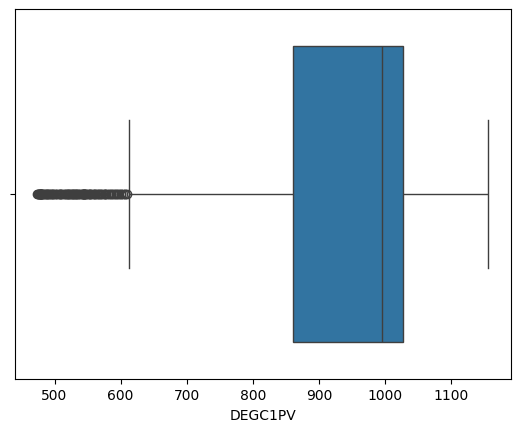

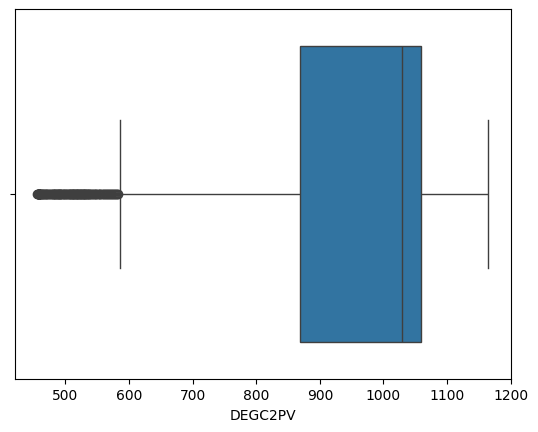

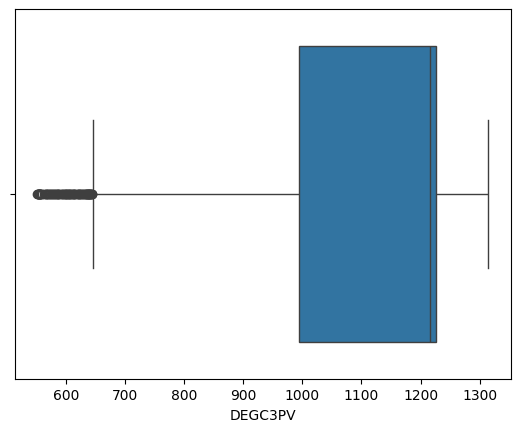

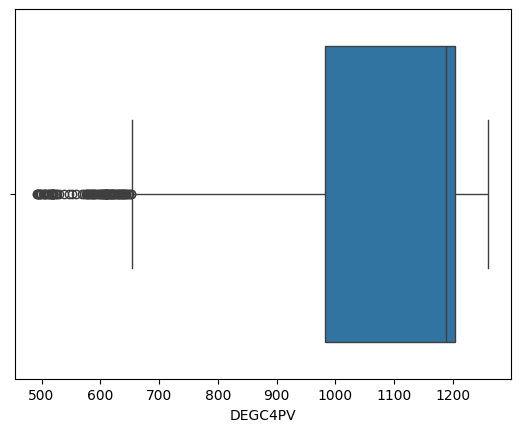

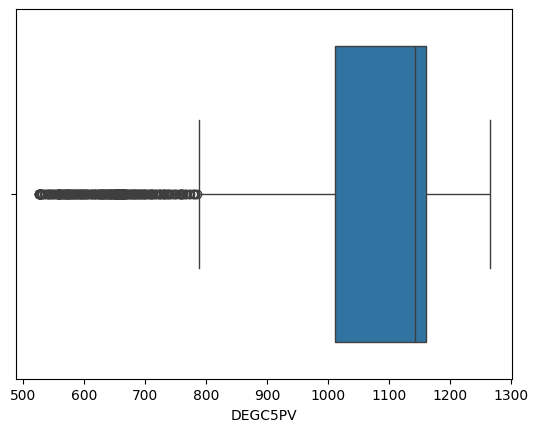

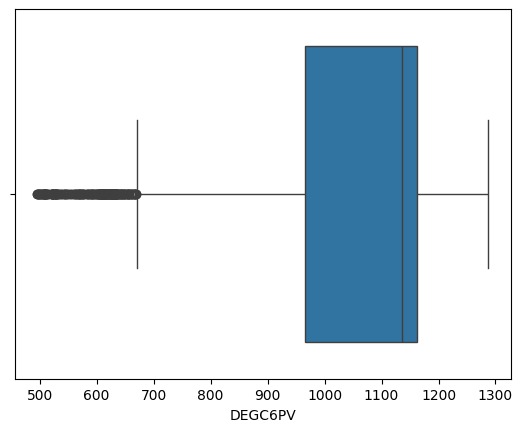

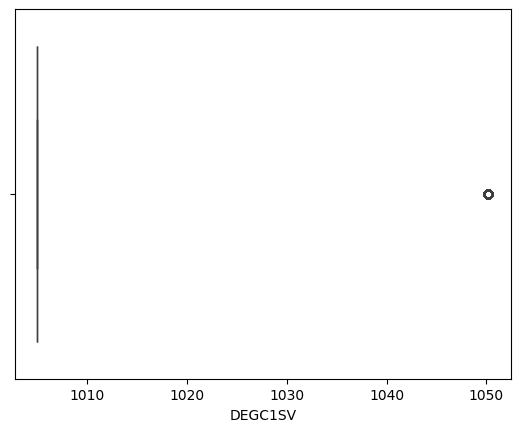

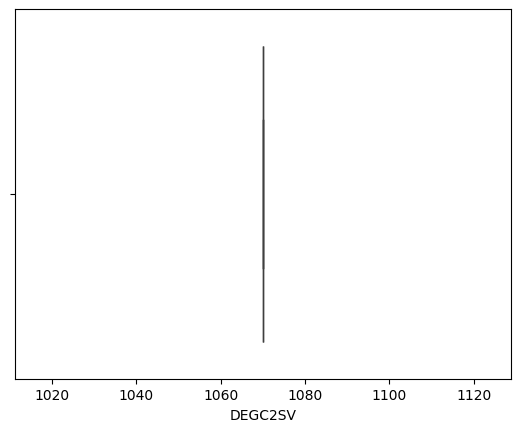

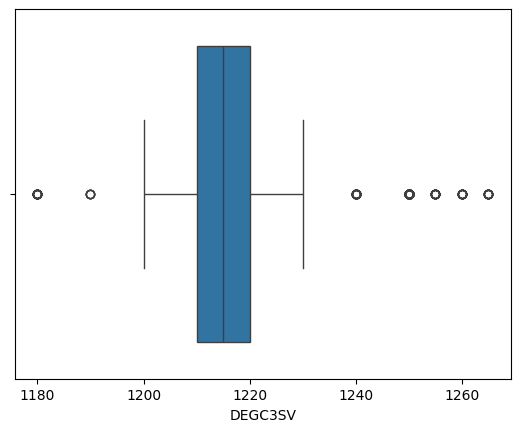

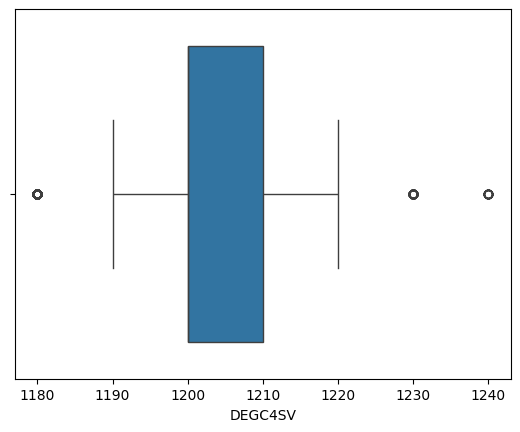

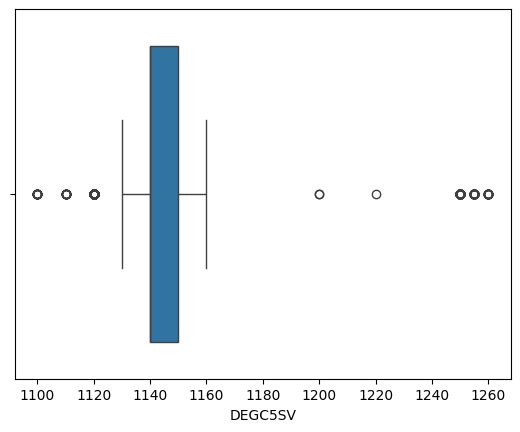

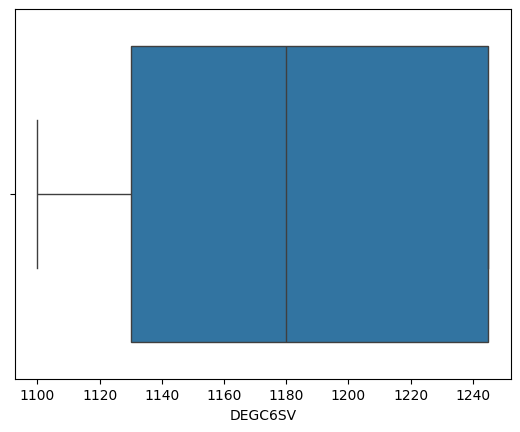

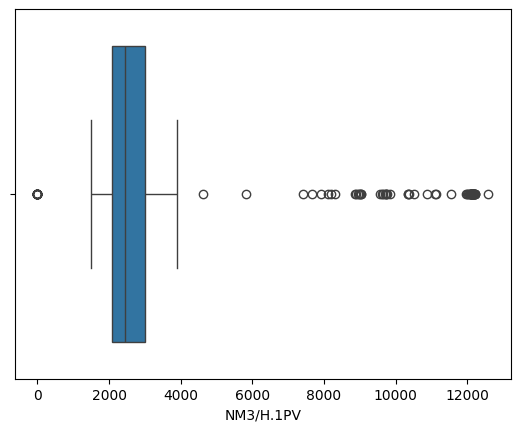

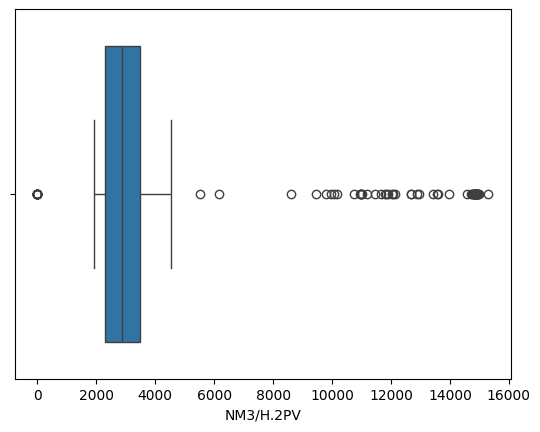

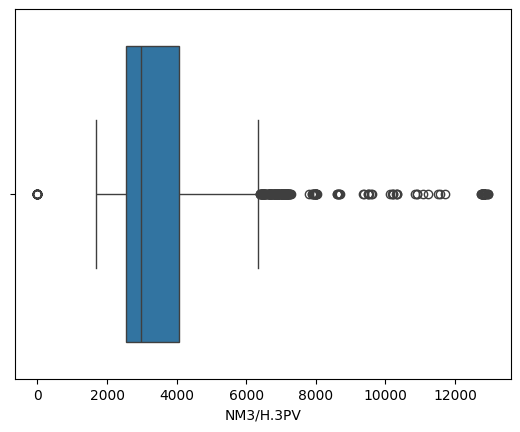

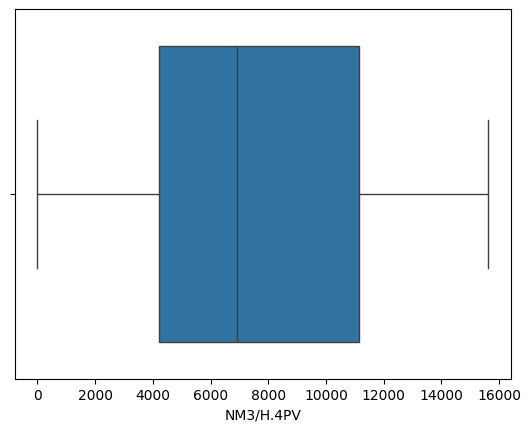

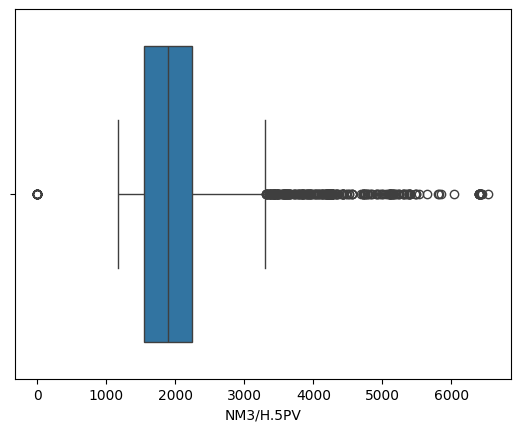

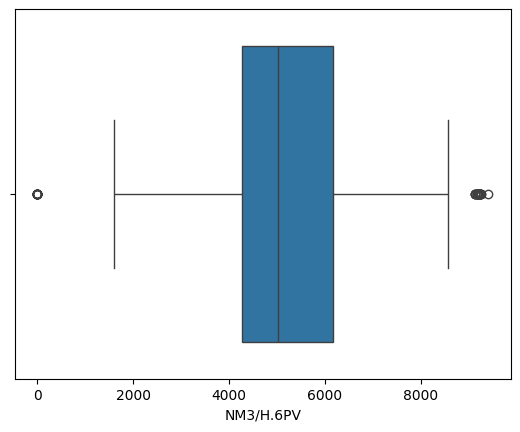

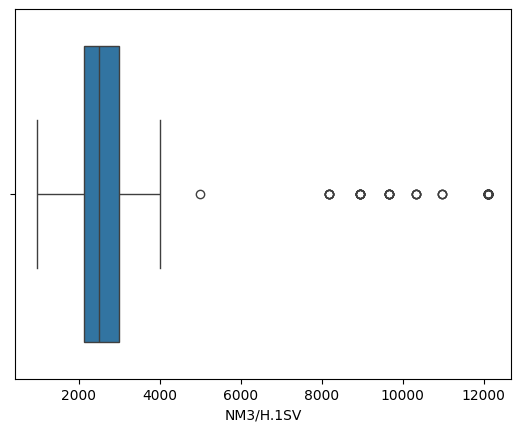

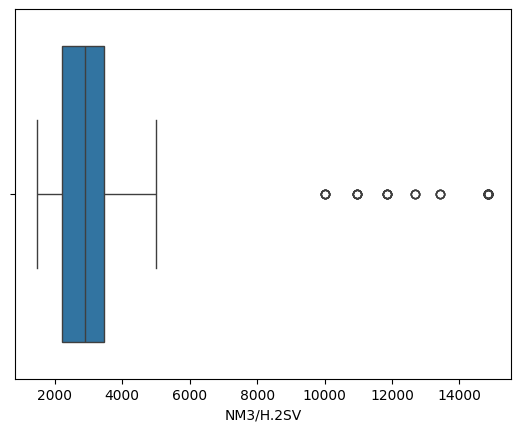

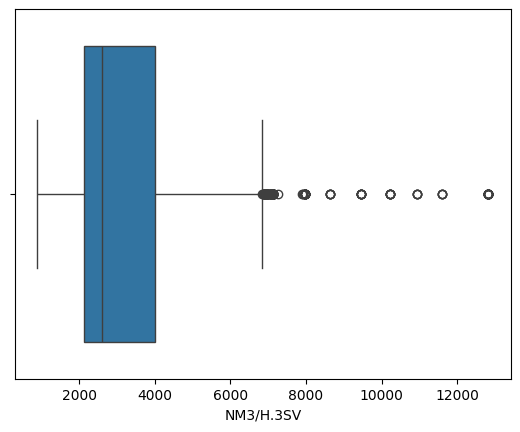

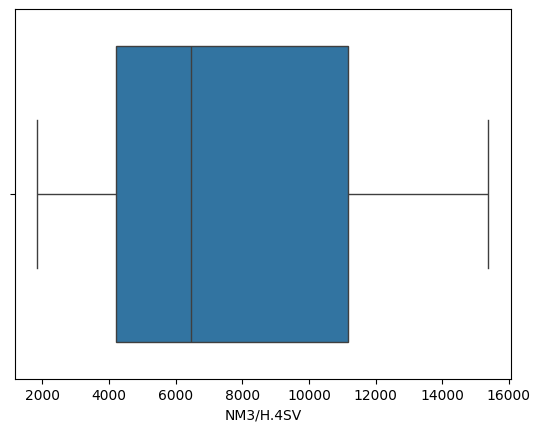

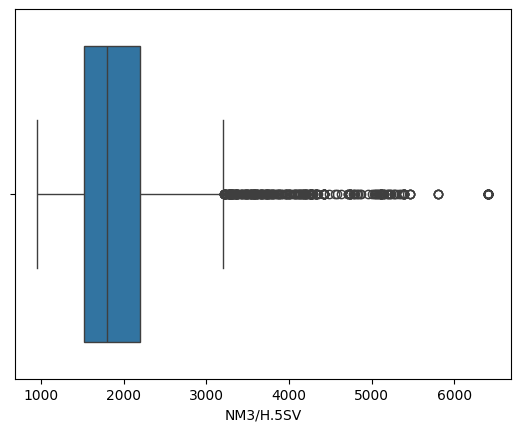

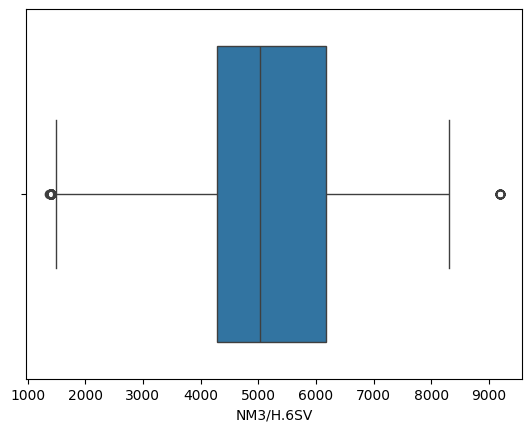

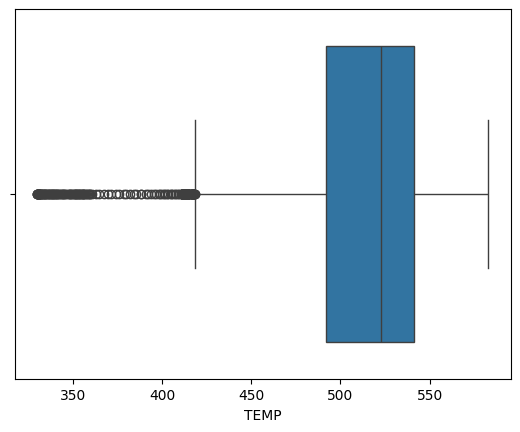

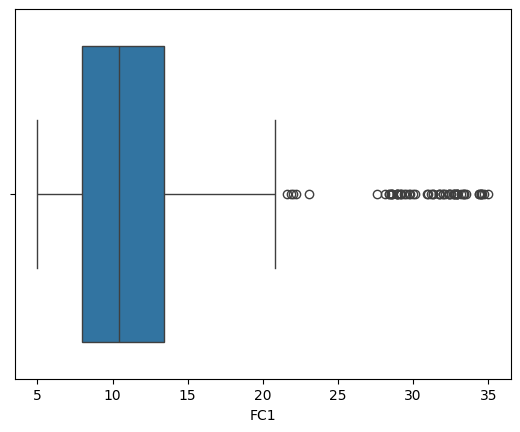

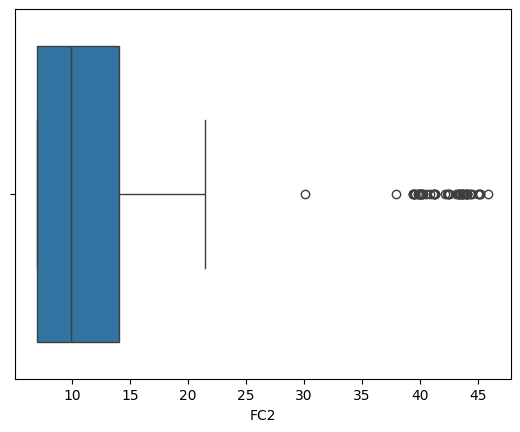

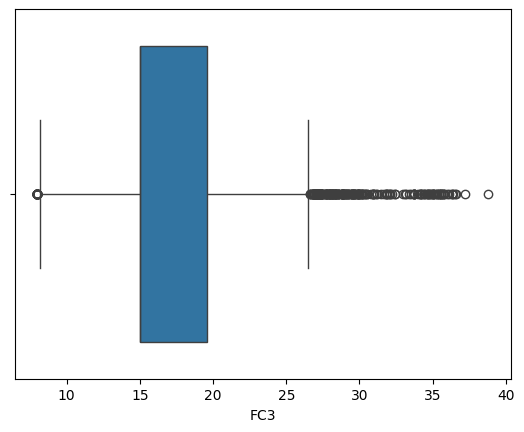

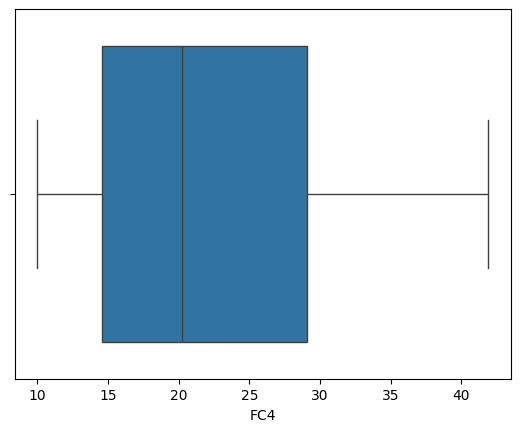

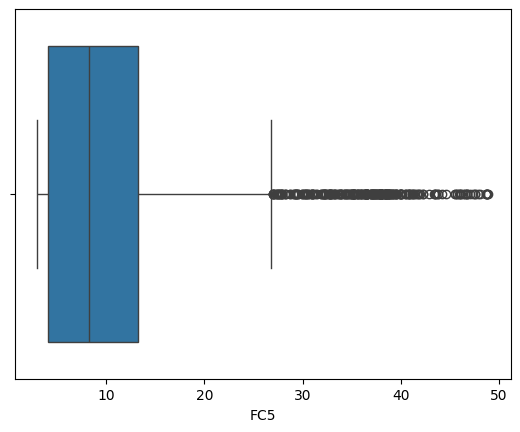

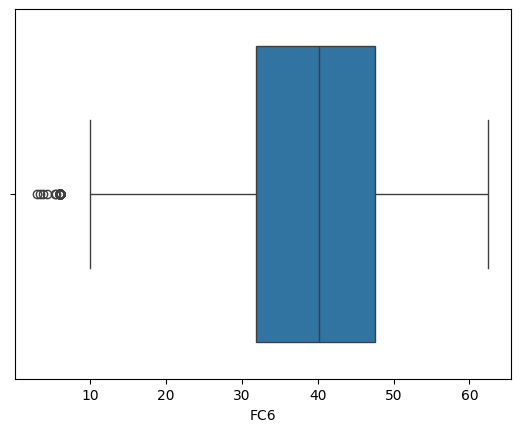

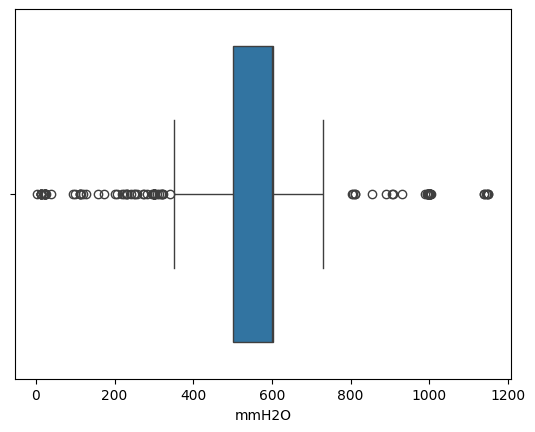

In [48]:
for i in merge_1.columns:
  sns.boxplot(x=merge_1[i])
  plt.show()

## Multivariate Analysis
### Correlation Matrix

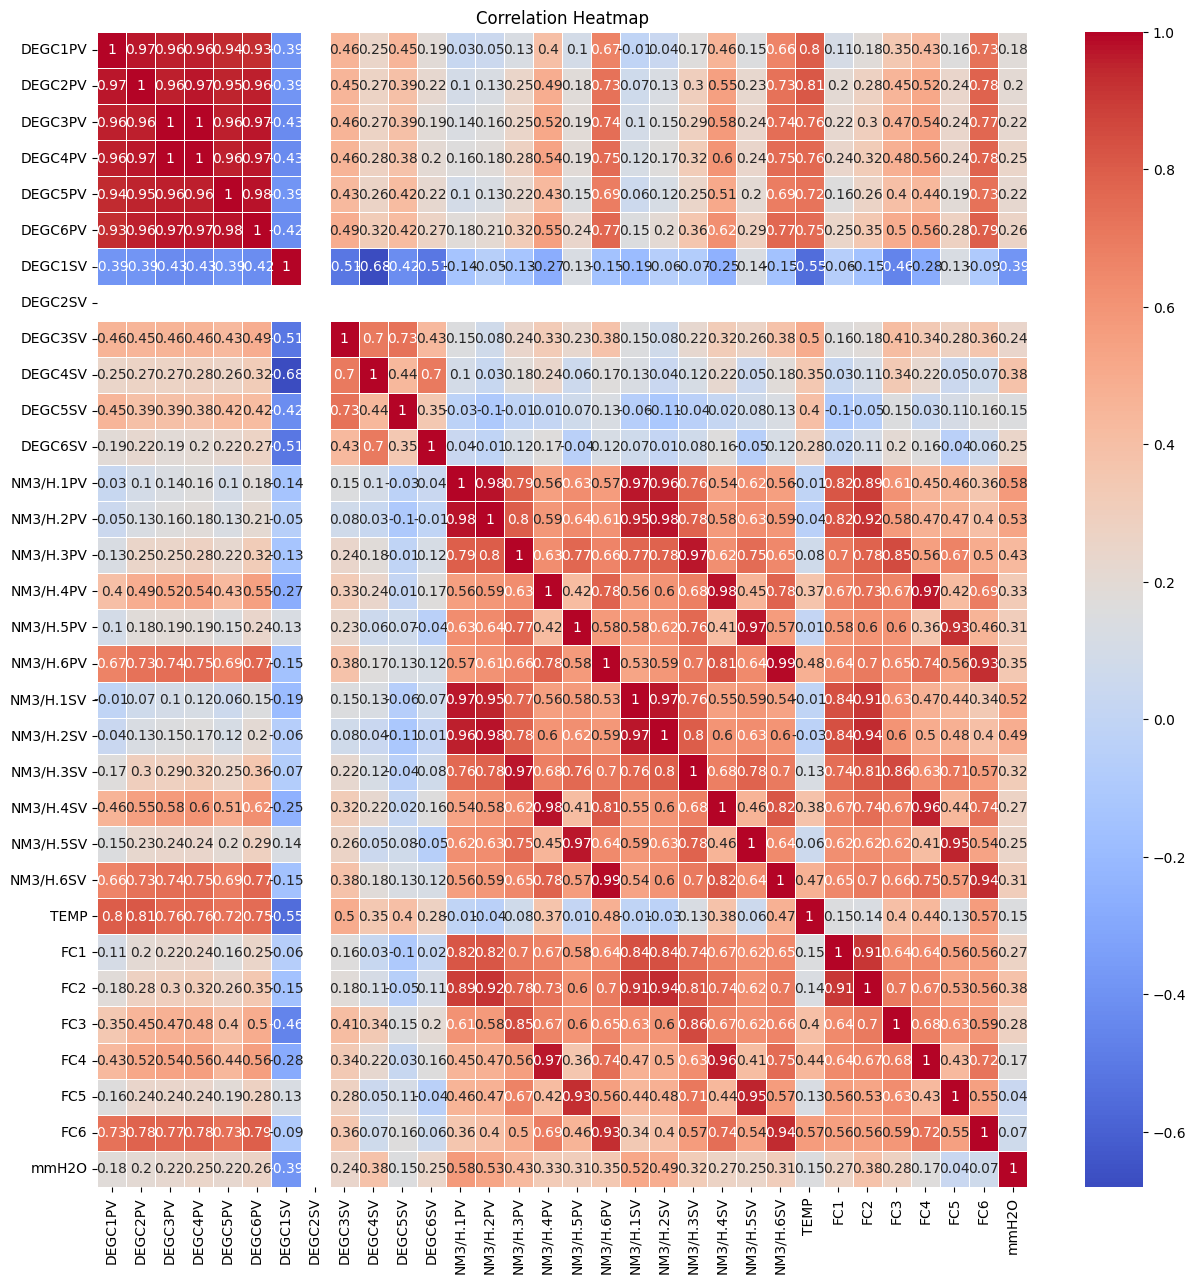

In [49]:
num_val = merge_1.select_dtypes(include=[np.number]).corr().round(2)

plt.figure(figsize=(15, 15))
sns.heatmap(num_val, annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [50]:
unrelated_column = ['DEGC1SV', 'DEGC2SV', 'DEGC3SV', 'DEGC4SV', 'DEGC5SV', 'DEGC6SV', 'TEMP', 'FC4', 'FC5', 'FC6',
                    'DEGC1PV', 'DEGC2PV', 'DEGC3PV', 'DEGC4PV', 'DEGC5PV', 'DEGC6PV', 'NM3/H.3PV', 'NM3/H.4PV',
                    'NM3/H.5PV', 'NM3/H.6PV', 'NM3/H.3SV', 'NM3/H.4SV', 'NM3/H.5SV', 'NM3/H.6SV', 'FC1', 'FC2', 'FC3']

merge_2 = merge_1.copy()

for i in unrelated_column:
  try:
    merge_2 = merge_2.drop(i, axis=1, errors='ignore')
  except:
    pass

In [51]:
merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3840 entries, 0 to 863
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   NM3/H.1PV  3840 non-null   int64
 1   NM3/H.2PV  3840 non-null   int64
 2   NM3/H.1SV  3840 non-null   int64
 3   NM3/H.2SV  3840 non-null   int64
 4   mmH2O      3840 non-null   int64
dtypes: int64(5)
memory usage: 180.0 KB


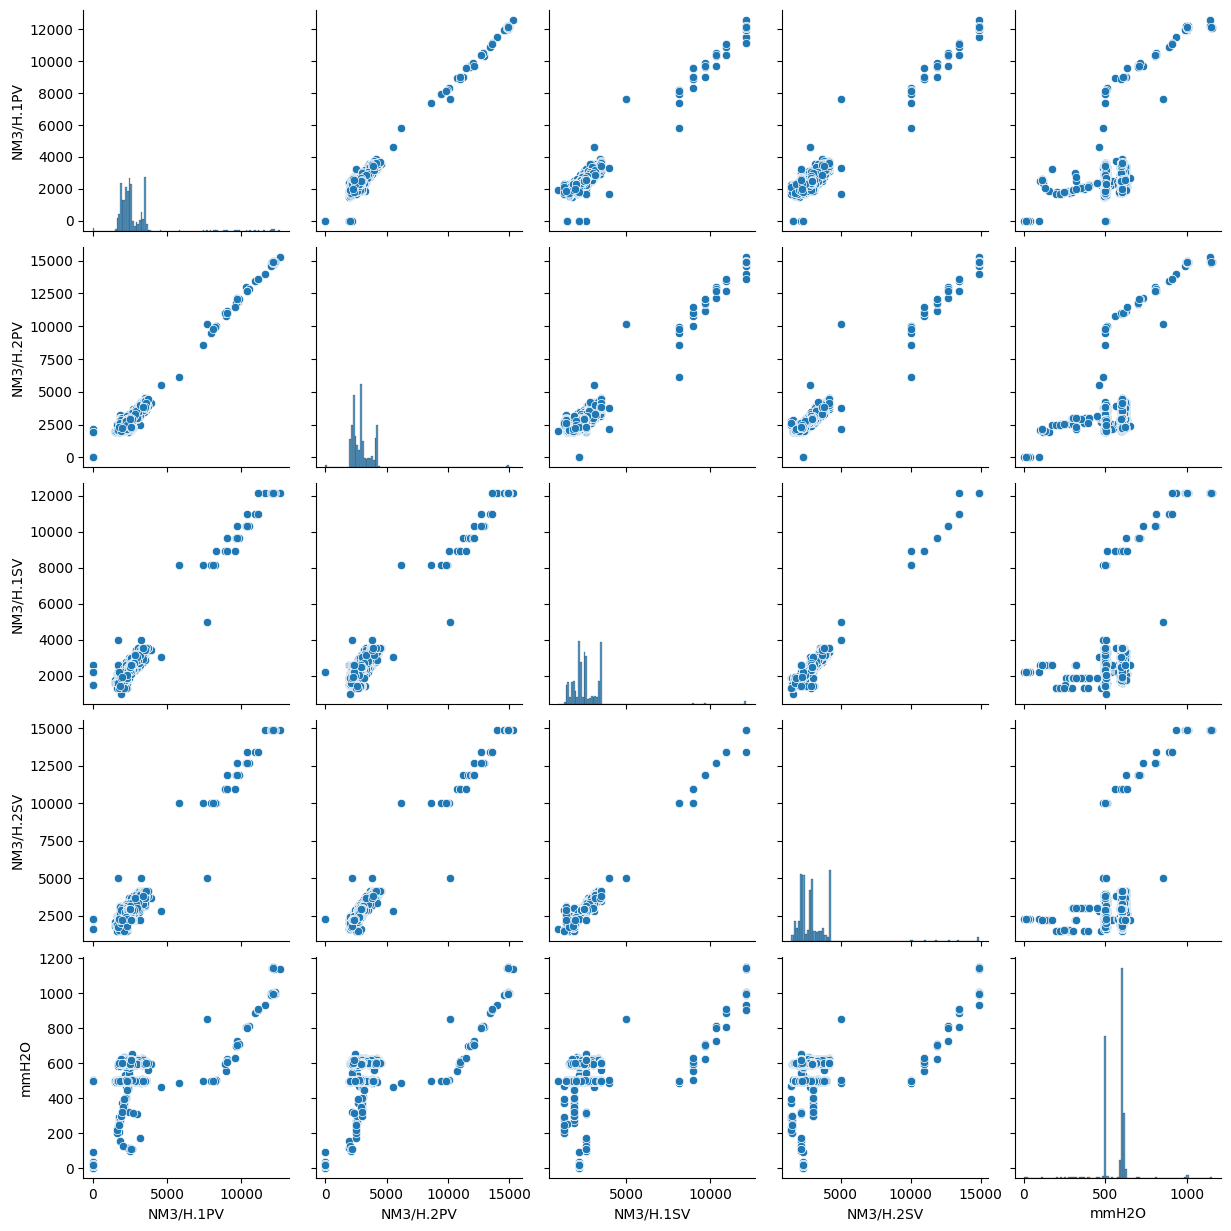

In [52]:
sns.pairplot(merge_2)

### Important Key Points

*   All DEGC2SV variable values are stagnant at 1070, so they have no impact on the target
*   Each variable has quite a lot of outlier values, but it is still retained because it can represent noise in real time
*   From correlation matrix above, we can conclude that NM3/H.1PV, NM3/H.2PV, NM3/H.1SV, and NM3/H.2SV is the most influencial variables to source input pressure, so we can drop the other unnacessary variables

## Principal Component Analysis
This step is important, Principal Component Analysis (PCA) helps to eliminate redundancy by transforming the original features into a smaller set of uncorrelated variables (principal components), making the data easier to analyze by the model. Turns out that the most influencial principal component variance is 0.978, followed by 0.012 and 0.009. We can ignore the last two dimension because it has a very small variance corresponding to the first one [[ 3 ]](https://www.sciencedirect.com/science/article/pii/S1877050919321507). Thus simplify the problem that the models try to solve [[ 4 ]](https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202).

In [53]:
pca = PCA(n_components=3, random_state=37)
pca_result = pca.fit(merge_2[['NM3/H.1PV', 'NM3/H.2PV', 'NM3/H.1SV', 'NM3/H.2SV']])
princ_comp = pca.transform(merge_2[['NM3/H.1PV', 'NM3/H.2PV', 'NM3/H.1SV', 'NM3/H.2SV']])

In [54]:
pca.explained_variance_ratio_.round(3)

array([0.978, 0.012, 0.009])

In [55]:
merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3840 entries, 0 to 863
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   NM3/H.1PV  3840 non-null   int64
 1   NM3/H.2PV  3840 non-null   int64
 2   NM3/H.1SV  3840 non-null   int64
 3   NM3/H.2SV  3840 non-null   int64
 4   mmH2O      3840 non-null   int64
dtypes: int64(5)
memory usage: 180.0 KB


In [56]:
pca = PCA(n_components=1, random_state=37)
pca_result = pca.fit(merge_2[['NM3/H.1PV', 'NM3/H.2PV', 'NM3/H.1SV', 'NM3/H.2SV']])
merge_2['dimension'] = pca.transform(merge_2.loc[:, ('NM3/H.1PV', 'NM3/H.2PV', 'NM3/H.1SV', 'NM3/H.2SV')]).flatten()
merge_2.drop(['NM3/H.1PV', 'NM3/H.2PV', 'NM3/H.1SV', 'NM3/H.2SV'], axis=1, inplace=True)
merge_2.head()

,mmH2O,dimension
0,501,1694.953344
1,618,1734.854328
2,500,-427.866737
3,605,2137.414627
4,501,-2133.792016


In [57]:
merge_2.head()

,mmH2O,dimension
0,501,1694.953344
1,618,1734.854328
2,500,-427.866737
3,605,2137.414627
4,501,-2133.792016


# Spliting Dataset into Train and Test Set
To initiate the model development, splitting the data into train and test set is necessary. Moreover, this project using supervised learning. The train set serve as learning agent while test set serve as evaluating agent.

In [58]:
x = merge_2[['dimension']]
y = merge_2['mmH2O']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 37)

In [59]:
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 3840
Total # of sample in train dataset: 3072
Total # of sample in test dataset: 768


## Standardization
In order to scaling the dataset value, we can use standardization method. It transform the dataset in such a way to have a mean of 0 and standard deviation of 1. Moreover, standardization method is the superior scaling technique for medium and large dataset [[ 5 ]](https://ieeexplore.ieee.org/document/10681438).

In [60]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [61]:
scaler.fit(x_test)
x_test = scaler.transform(x_test)

# Model Development
In this step, the algorithm used for model developments are K-Nearest Neighbour, Linear Regression, and Dense Neural Network.

* K-Nearest Neighbour = KNN is a simple, instance-based learning algorithm. It classifies a new data point based on the majority class of its K-nearest neighbors in the feature space.
 * Pros
   * Simple to understand and implement
   * No explicit training phase (lazy learning)
 * Cons
   * Computationally expensive for large datasets (due to distance calculations)
   * Sensitive to irrelevant or unscaled features
   * Performance depends on the choice of K and distance metric
* Linear Regression = Linear regression models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the data.
 * Pros
   * Simple, interpretable model
   * Works well when there is a linear relationship between features and the target
 * Cons
   * Limited to linear relationships
   * Sensitive to outliers
   * Assumes no multicollinearity between features (when using multiple features)
* Dense Neural Network = A dense neural network (DNN) consists of layers of neurons where each neuron in one layer is connected to every neuron in the next layer (hence the term "fully connected").
 * Pros
   * Can model highly complex relationships between input and output
   * Scalable to large datasets and tasks like image recognition, natural language processing, etc
 * Cons
   * Requires a large amount of data and computational resources to train effectively
   * Prone to overfitting, especially with small datasets
   * Difficult to interpret compared to simpler models like linear regression

In [62]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN','Linear Regression', 'ANN'])

LR = LinearRegression()
LR.fit(x_train, y_train)

models.loc['train_mse','Linear Regression'] = mean_squared_error(y_pred=LR.predict(x_train), y_true=y_train)

In [63]:
model = Sequential()
model.add(Dense(2048, input_dim=1, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.fit(x_train, y_train, epochs=500, batch_size=100, verbose=2)

Epoch 1/500
31/31 - 5s - 168ms/step - loss: 197594.8750 - mse: 197594.8750
Epoch 2/500
31/31 - 2s - 80ms/step - loss: 18916.2285 - mse: 18916.2285
Epoch 3/500
31/31 - 0s - 4ms/step - loss: 6453.0415 - mse: 6453.0415
Epoch 4/500
31/31 - 0s - 4ms/step - loss: 5250.0801 - mse: 5250.0801
Epoch 5/500
31/31 - 0s - 4ms/step - loss: 5224.1982 - mse: 5224.1982
Epoch 6/500
31/31 - 0s - 4ms/step - loss: 4945.3081 - mse: 4945.3081
Epoch 7/500
31/31 - 0s - 4ms/step - loss: 4770.9331 - mse: 4770.9331
Epoch 8/500
31/31 - 0s - 4ms/step - loss: 4744.5054 - mse: 4744.5054
Epoch 9/500
31/31 - 0s - 4ms/step - loss: 4586.4297 - mse: 4586.4297
Epoch 10/500
31/31 - 0s - 3ms/step - loss: 4377.5215 - mse: 4377.5215
Epoch 11/500
31/31 - 0s - 4ms/step - loss: 4375.5430 - mse: 4375.5430
Epoch 12/500
31/31 - 0s - 4ms/step - loss: 4037.1277 - mse: 4037.1277
Epoch 13/500
31/31 - 0s - 3ms/step - loss: 3961.9473 - mse: 3961.9473
Epoch 14/500
31/31 - 0s - 4ms/step - loss: 3750.0378 - mse: 3750.0378
Epoch 15/500
31/31 -

In [65]:
models.loc['train_mse','ANN'] = mean_squared_error(y_pred=model.predict(x_train), y_true=y_train)

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [66]:
KNN = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
KNN.fit(x_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred=KNN.predict(x_train), y_true=y_train)

In [80]:
models

,KNN,Linear Regression,ANN
train_mse,1731.472565,5030.204433,2773.792928
test_mse,NaN,NaN,NaN


From metric evaluation table above, we can conclude that K-Nearest Neighbour algorithm is the most desired algortihm because has the lowest MSE value, followed by Dense Neural Network, and the last is Linear Regression.

# Model Evaluation
The matrix evaluation used for this step is Mean Squared Error
\begin{align*}
\text{MSE}(y, x) = \frac{\sum_{i=0}^{N - 1} (y_i - x_i)^2}{N}
\end{align*}

Where:

* N = Amount of the data
* i = Index of the data
* y = Actual value
* x = Predicted value

MSE is a metric used to measure the average squared difference between the predicted values and the actual values in the dataset. It is calculated by taking the average of the squared residuals, where the residual is the difference between predicted value and the actual value for each data point [[ 6 ]](https://www.geeksforgeeks.org/mean-squared-error/). A lower MSE indicates that the model's predictions are closer to the actual values signifying better accuracy. While, a higher MSE suggests that the model's predictions deviate further from true values indicating the poorer performance.

In [75]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','Linear Regression', 'ANN'])

model_dict = {'KNN': KNN, 'Linear Regression': LR, 'ANN': model}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))

mse

39/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,train,test
KNN,1731.472565,4193.040469
Linear Regression,5030.204433,5404.623604
ANN,2773.792928,4416.747013


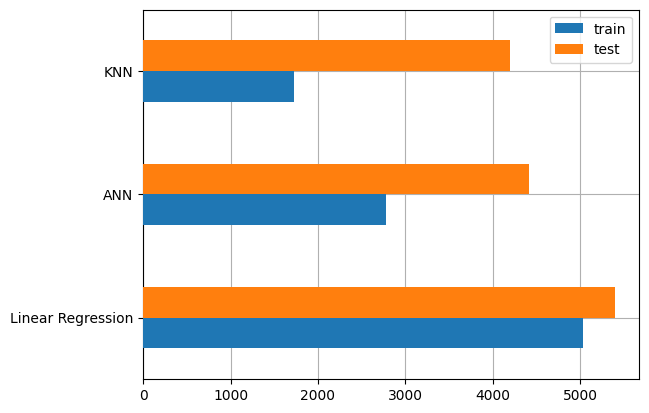

In [69]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [70]:
x_train = pd.DataFrame(x_train, columns=['dimension'])
x_test = pd.DataFrame(x_test, columns=['dimension'])

## Model Prediction
This step is carried out to see how each machine learning algorithm predicting the target data (source pressure).

In [79]:
pred = x_test.iloc[:500].copy()

pred_dict = {'y_true': y_test.iloc[:500]}
pred_dict['dimension'] = pred['dimension'].values
pred_dict['LR'] = LR.predict(pred).ravel()
pred_dict['KNN'] = KNN.predict(pred).ravel()
pred_dict['ANN'] = model.predict(pred).ravel()

pd.DataFrame(pred_dict)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


,y_true,dimension,LR,KNN,ANN
770,601,0.252470,580.211521,590.6,577.855652
2151,600,-0.488413,546.462590,599.8,601.405212
1288,619,-0.329507,553.701149,611.2,606.670105
3003,500,-0.413522,549.874071,506.6,603.742737
2291,599,0.110104,573.726432,599.4,593.834167
...,...,...,...,...,...
724,498,-0.504641,545.723406,583.4,600.898621
1448,500,-0.178587,560.575883,539.8,524.018494
730,599,-0.454515,548.006760,604.2,602.463440
1215,600,-0.521911,544.936697,600.8,600.365173


<ipython-input-72-6690b5e801f6>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(311)


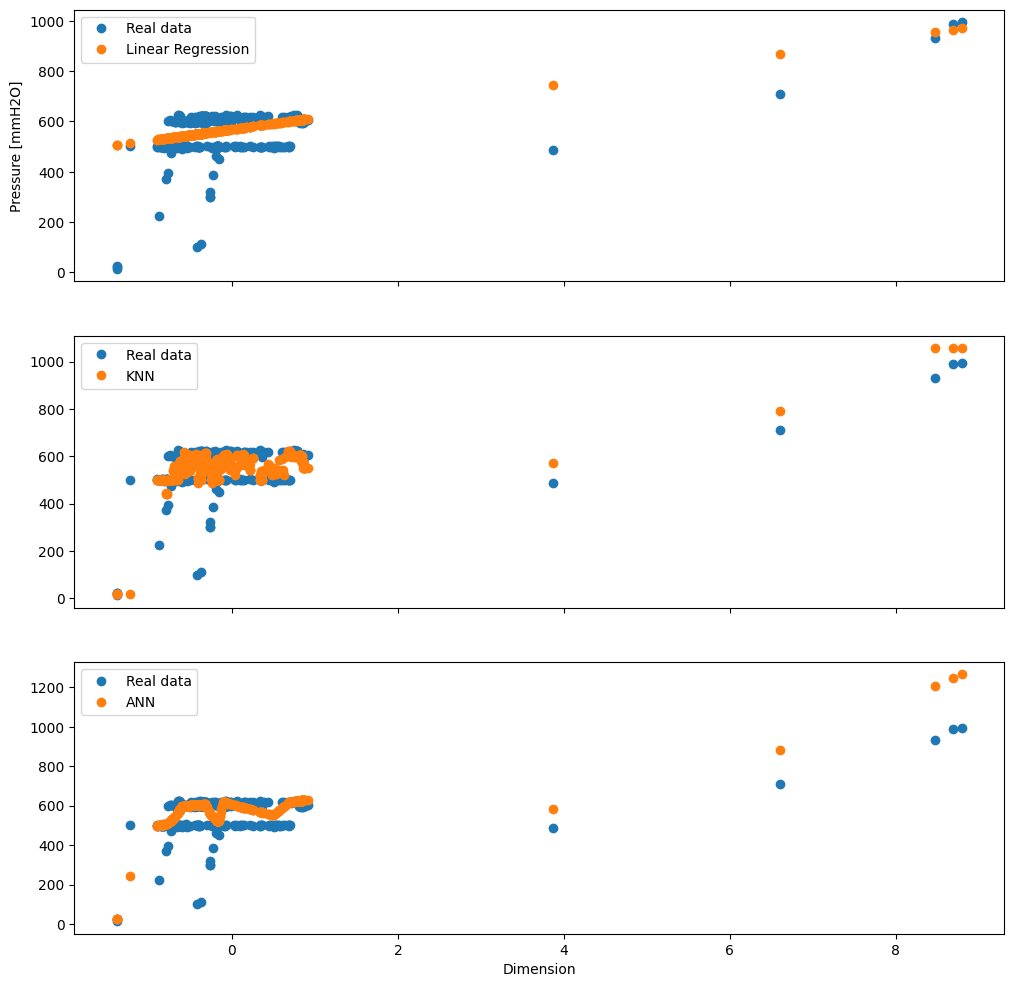

In [72]:
plt.subplots(figsize=(12, 12))

plt.subplot(311)
plt.plot(pred_dict['dimension'], pred_dict['y_true'], 'o', label='Real data')
plt.plot(pred_dict['dimension'], pred_dict['LR'], 'o', label='Linear Regression')
plt.ylabel('Pressure [mmH2O]')
plt.tick_params('x', labelbottom=False)
plt.legend()

plt.subplot(312)
plt.plot(pred_dict['dimension'], pred_dict['y_true'], 'o', label='Real data')
plt.plot(pred_dict['dimension'], pred_dict['KNN'], 'o', label='KNN')
plt.tick_params('x', labelbottom=False)
plt.legend()

plt.subplot(313)
plt.plot(pred_dict['dimension'], pred_dict['y_true'], 'o', label='Real data')
plt.plot(pred_dict['dimension'], pred_dict['ANN'], 'o', label='ANN')
plt.legend()
plt.xlabel('Dimension')

plt.show()

From the figure above, we can compare how prediction data and real data from each machine learning algorithm (K-Nearest Neighbour, Linear Regression, Dense Neural Network). Clearly, Linear Regression generated data point in a straight line. K-Nearest Neighbour generated data points that gather in one area. Then Dense Neural Network seems to struggle with its predictions forming a smoother but lower curve that doesn't capture the wide spread of real data.

# Reference

*   [ 1 ] J. Conradt, “A comparison between a traditional PID controller and an Artificial Neural Network controller in manipulating a robotic arm,” 2019. Accessed: Oct. 22, 2024. [Online]. Available: https://www.semanticscholar.org/paper/A-comparison-between-a-traditional-PID-controller-a-Conradt/efb1c57c0dbc3b88cd35085f677869104fce5474

*   [ 2 ] “Smart Pressure Control Prediction.” Accessed: Oct. 23, 2024. [Online]. Available: https://www.kaggle.com/datasets/guanlintao/smart-pressure-control-prediction

*   [ 3 ] N. Salem and S. Hussein, “Data dimensional reduction and principal components analysis,” Procedia Computer Science, vol. 163, pp. 292–299, Jan. 2019, doi: 10.1016/j.procs.2019.12.111.

*   [ 4 ] I. T. Jolliffe and J. Cadima, “Principal component analysis: a review and recent developments,” Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, vol. 374, no. 2065, p. 20150202, Apr. 2016, doi: 10.1098/rsta.2015.0202.

*   [ 5 ] K. Mahmud Sujon, R. Binti Hassan, Z. Tusnia Towshi, M. A. Othman, M. Abdus Samad, and K. Choi, “When to Use Standardization and Normalization: Empirical Evidence From Machine Learning Models and XAI,” IEEE Access, vol. 12, pp. 135300–135314, 2024, doi: 10.1109/ACCESS.2024.3462434.

*   [ 6 ] “Mean Squared Error | Definition, Formula, Interpretation and Examples,” GeeksforGeeks. Accessed: Oct. 23, 2024. [Online]. Available: https://www.geeksforgeeks.org/mean-squared-error/
